In [4]:
# question 1 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "C:/Users/singh/Downloads/IOT CLASS CONTENT/RFM_CLTV_Dataset.xlsx"

df = pd.read_excel(file_path)
df.shape

(1500, 9)

In [9]:
# question 2 
missing_values = df.isnull().sum()
print(missing_values)

data_types = df.dtypes
print(data_types)


CustomerID           0
Recency              0
Frequency            0
Monetary             0
AOV                  0
PurchaseFrequency    0
CustomerValue        0
ProfitMargin         0
CLTV                 0
dtype: int64
CustomerID            object
Recency                int64
Frequency              int64
Monetary             float64
AOV                  float64
PurchaseFrequency      int64
CustomerValue        float64
ProfitMargin         float64
CLTV                 float64
dtype: object


In [27]:
# question 3 
top5mv = df.sort_values(by='Monetary', ascending=False).head(5)
print("Top 5 Customers with high Monetary value")
print(top5mv[['CustomerID', 'Monetary']])




Top 5 Customers with high Monetary value
     CustomerID  Monetary
451    CUST1451   4998.57
921    CUST1921   4997.72
639    CUST1639   4997.34
123    CUST1123   4985.42
1103   CUST2103   4981.35


In [28]:
# Q4
recent_customer = df.sort_values(by='Recency').head(1)
print("The most recent visited cumtomer")
print(recent_customer[['CustomerID', 'Recency']] )


The most recent visited cumtomer
    CustomerID  Recency
848   CUST1848        1


In [32]:
# Q5
avg_frequency = df['Frequency'].mean()
avg_monetary = df['Monetary'].mean()
print("Average frequency value:", avg_frequency)
print("Average monetary value:", avg_monetary)



Average frequency value: 49.348
Average monetary value: 2561.81358


In [49]:
#Question 6

df['R'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
df['F'] = pd.qcut(df['Frequency'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
df['M'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)


#Question 7

df['RFM_Segment'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

print(df['RFM_Segment'])

#question 8 

segment_avg_cltv = df.groupby('RFM_Segment')['CLTV'].mean().sort_values(ascending=False)
print(segment_avg_cltv)




0       412
1       123
2       255
3       452
4       531
       ... 
1495    534
1496    255
1497    211
1498    211
1499    442
Name: RFM_Segment, Length: 1500, dtype: object
RFM_Segment
445    748.205385
455    728.243077
535    726.150000
255    707.649500
235    703.984000
          ...    
151     71.563846
221     70.370000
431     66.244211
231     57.260000
441     41.393333
Name: CLTV, Length: 125, dtype: float64


In [52]:
#question 9 

champions = df[(df['R'] == 5) & (df['F'] == 5) & (df['M'] == 5)]
champions.head(5)


,CustomerID,Recency,Frequency,Monetary,AOV,PurchaseFrequency,CustomerValue,ProfitMargin,CLTV,R,F,M,RFM_Segment
114,CUST1114,33,98,4285.80,43.73,98,4285.54,0.12,514.26,5,5,5,555
136,CUST1136,42,93,4591.86,49.37,93,4591.41,0.21,964.20,5,5,5,555
723,CUST1723,65,98,4687.52,47.83,98,4687.34,0.23,1078.09,5,5,5,555
773,CUST1773,54,95,4321.17,45.49,95,4321.55,0.11,475.37,5,5,5,555
906,CUST1906,28,98,4414.84,45.05,98,4414.90,0.18,794.68,5,5,5,555


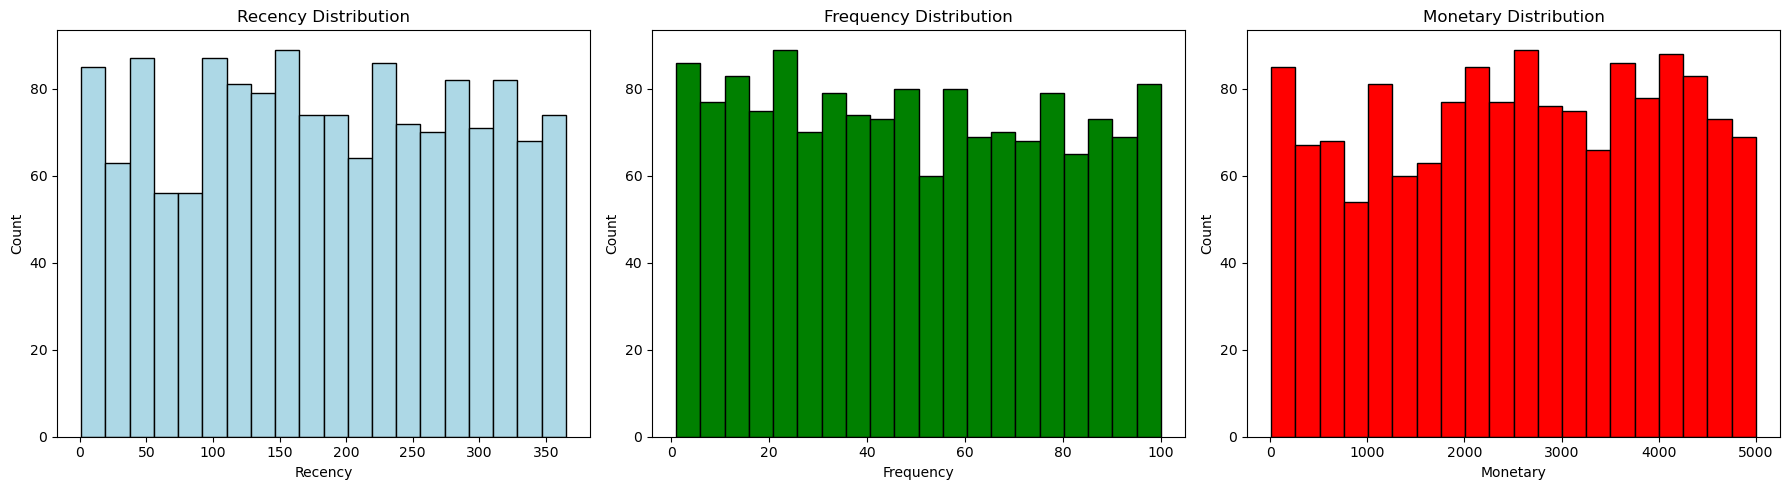

In [59]:
import matplotlib.pyplot as plt

# Question 10: Visualize histograms for Recency, Frequency, and Monetary
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
plt.hist(df['Recency'], bins=20, color='lightblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

# Frequency
plt.subplot(1, 3, 2)
plt.hist(df['Frequency'], bins=20, color='green', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Monetary
plt.subplot(1, 3, 3)
plt.hist(df['Monetary'], bins=20, color='red', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [62]:
# question 11 

# Calculate AOV using Monetary and Frequency, and compare with existing AOV column
df['Calculated_AOV'] = df['Monetary'] / df['Frequency']

# Check if the calculated AOV matches the existing AOV
aov_match = (df['AOV'].round(2) == df['Calculated_AOV'].round(2)).value_counts()

# Display mismatches, if any
aov_mismatches = df[df['AOV'].round(2) != df['Calculated_AOV'].round(2)][['CustomerID', 'AOV', 'Calculated_AOV']]

aov_match, aov_mismatches.head()

df['Calculated_AOV'] = df['Monetary'] / df['Frequency']


print(df['Calculated_AOV'])


0       103.462222
1        67.192188
2        44.015625
3        13.616263
4        20.265385
           ...    
1495     72.770364
1496     48.087717
1497     45.346429
1498    101.076000
1499     13.612125
Name: Calculated_AOV, Length: 1500, dtype: float64


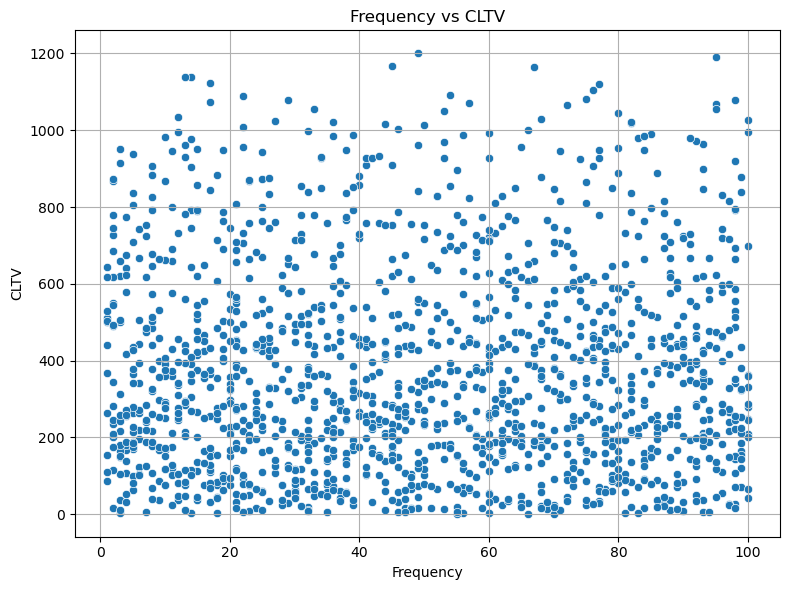

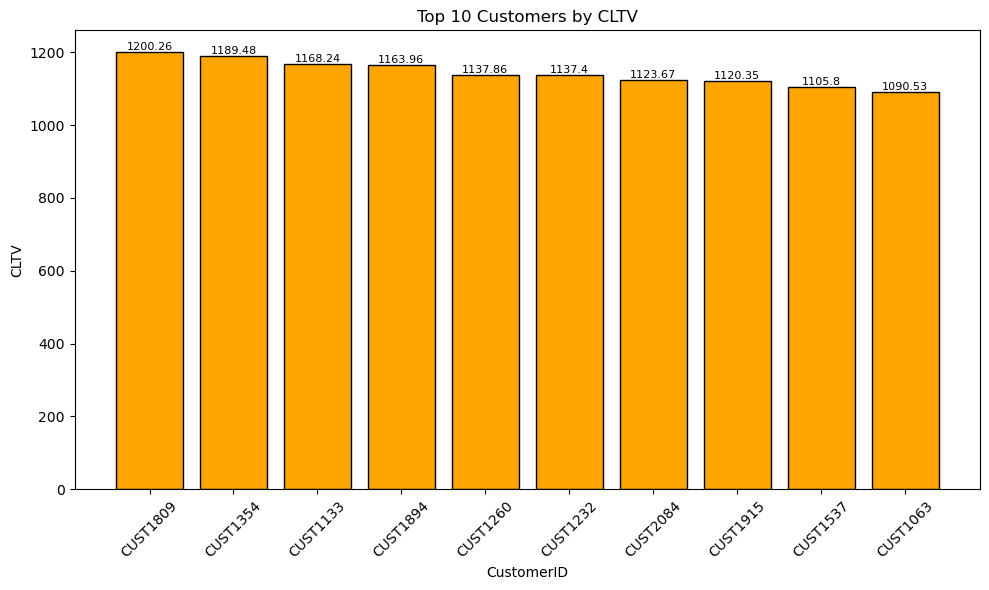

(True    1500
 Name: count, dtype: int64,
 Empty DataFrame
 Columns: [CustomerID, CustomerValue, Calculated_CustomerValue]
 Index: [],
   CustomerID    CLTV   CLTV_15
 0   CUST1000  353.83  279.3420
 1   CUST1001  365.51  322.5120
 2   CUST1002  718.41  633.8880
 3   CUST1003  323.61  202.2570
 4   CUST1004  166.01  118.5795)

In [63]:
# Question 12: Recalculate Customer Value = AOV * PurchaseFrequency
df['Calculated_CustomerValue'] = df['AOV'] * df['PurchaseFrequency']

# Check mismatches
value_match = (df['CustomerValue'].round(2) == df['Calculated_CustomerValue'].round(2)).value_counts()
value_mismatches = df[df['CustomerValue'].round(2) != df['Calculated_CustomerValue'].round(2)][['CustomerID', 'CustomerValue', 'Calculated_CustomerValue']]

# Question 13: Recalculate CLTV with assumed profit margin = 0.15
df['CLTV_15'] = df['CustomerValue'] * 0.15

# Compare new CLTV with original
cltv_comparison = df[['CustomerID', 'CLTV', 'CLTV_15']].head()

# Question 14: Scatterplot between Frequency and CLTV
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Frequency', y='CLTV', data=df)
plt.title("Frequency vs CLTV")
plt.xlabel("Frequency")
plt.ylabel("CLTV")
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 15: Bar plot for top 10 customers by CLTV
top10_cltv = df.sort_values(by='CLTV', ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.bar(top10_cltv['CustomerID'], top10_cltv['CLTV'], color='orange', edgecolor='black')
plt.title("Top 10 Customers by CLTV")
plt.xlabel("CustomerID")
plt.ylabel("CLTV")
plt.xticks(rotation=45)

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

value_match, value_mismatches.head(), cltv_comparison
